## Wrangling Data (Project #5)

- <a href='#intro' >Introdaction  </a>
- <a href='#gather' >Gather  </a>
- <a href='#assess' >Assess  </a>
- <a href='#clean' >Clean  </a>
- <a href='#store' >Store  </a>
- <a href='#analyze' >Analyzing, and Visualizing Data   </a>

## Introduction  <a id='intro'></a>

#### wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

### The Data We Have
- Enhanced Twitter Archive
- Additional Data via the Twitter API (tweet-json.txt)
- Image Predictions File

### Key Points
Key points to keep in mind when data wrangling for this project:

- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

### Gathering Data for this Project
Gather each of the three pieces of data as described below in a Jupyter Notebook titled wrangle_act.ipynb:

-  The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv

- The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

- Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

### Assessing Data for this Project
After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

### Cleaning Data for this Project
Clean each of the issues you documented while assessing. Perform this cleaning in wrangle_act.ipynb as well. The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate). Again, the issues that satisfy the Project Motivation must be cleaned.

### Storing, Analyzing, and Visualizing Data for this Project
Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.

# <font color='red'>I Will Use the meterial in the bottom (Accessing Project Data Without a Twitter Account)
use twitter-api.py and tweet-json.txt </font>

for 2 resons
- I faced a problem when creating an email (no reply )
- This process consumes a lot of time

In [1]:
import pandas as pd
import numpy as np
import json
import os 
import requests
import matplotlib.pyplot as plt
% matplotlib inline

import tweepy 

## Gather  <a id='gather'></a>

In [2]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv') # load twitter-archive-enhanced.csv
twitter_archive_df.head() 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Download mage_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
# write the content in tsv file 
with open ('image_predictions.tsv','wb') as file:
    file.write(response.content)

In [4]:
image_predictions_df = pd.read_csv('image_predictions.tsv' , sep='\t') # read tsv file ( Tab (\t) )
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
# Skip  tweepy API step 

In [6]:
list_df = [] # list stor data from json to convert it to df
with open('tweet-json.txt', encoding='utf-8') as JFile:   
    all_data = [json.loads(line) for line in JFile] # read all json file content
    for json_dict in all_data:
        tweet_id = json_dict['id']
        # on tweet 
        retweet_count = json_dict['retweet_count']
        favorite_count = json_dict['favorite_count']
         # additional data   
        tweet_text = json_dict['full_text']
        tweet_date = json_dict['created_at']
        
        # from profile
        followers_count = json_dict['user']['followers_count']
        friends_count = json_dict['user']['friends_count']
        original_tweet = bool(retweet_count)  
        # adding the data into the list
        list_df.append({'tweet_id': str(tweet_id),             
                        'retweet_count': int(retweet_count),
                        'favorite_count': int(favorite_count),
                        'tweet_text': str(tweet_text),
                        'tweet_date': pd.to_datetime(tweet_date),
                        'followers_count': int(followers_count),
                        'friends_count': int(friends_count)
                        })
        # convert to df
        tweet_df = pd.DataFrame(list_df, columns = ['tweet_id', 'retweet_count','favorite_count', 
                                                           'tweet_text', 'tweet_date','followers_count', 
                                                           'friends_count'])

In [7]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count,tweet_text,tweet_date,followers_count,friends_count
0,892420643555336193,8853,39467,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56,3200889,104
1,892177421306343426,6514,33819,This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27,3200889,104
2,891815181378084864,4328,25461,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:18:03,3200889,104
3,891689557279858688,8964,42908,This is Darla. She commenced a snooze mid meal...,2017-07-30 15:58:51,3200889,104
4,891327558926688256,9774,41048,This is Franklin. He would like you to stop ca...,2017-07-29 16:00:24,3200889,104


## Assess   <a id='assess'></a>
 1. **Quality : (content issues)**
     - Completness
     - Validation
     - Accuracy 
     - Consistency
 2. **Tidiness: (Structure issues)**
   

In [8]:
print(twitter_archive_df.shape)
twitter_archive_df

(2356, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
print ('max num.' , twitter_archive_df['rating_numerator'].max(),'min num.',twitter_archive_df['rating_numerator'].min() )
print ('max num.' , twitter_archive_df['rating_denominator'].max(),'min num.',twitter_archive_df['rating_denominator'].min() )

max num. 1776 min num. 0
max num. 170 min num. 0


In [12]:
twitter_archive_df[twitter_archive_df['rating_numerator'] == twitter_archive_df['rating_numerator'].max()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [13]:
twitter_archive_df[twitter_archive_df['rating_numerator'] == twitter_archive_df['rating_numerator'].min()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [14]:
twitter_archive_df[twitter_archive_df['rating_denominator'] == twitter_archive_df['rating_denominator'].max()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [15]:
twitter_archive_df[twitter_archive_df['rating_denominator'] == twitter_archive_df['rating_denominator'].min()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [16]:
twitter_archive_df['rating_denominator'].value_counts()


10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
twitter_archive_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
print ('Duplicates' , twitter_archive_df.duplicated().sum())
print ('Nulls' , twitter_archive_df.isna().sum())

Duplicates 0
Nulls tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64


In [19]:
print (twitter_archive_df['doggo'].value_counts() )
print (twitter_archive_df['floofer'].value_counts() )
print (twitter_archive_df['pupper'].value_counts() )
print (twitter_archive_df['puppo'].value_counts() )

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


In [20]:
# number of None in (doges without stage)
Doge_stage = twitter_archive_df['doggo'].value_counts()[1] + twitter_archive_df['floofer'].value_counts()[1] + twitter_archive_df['pupper'].value_counts()[1]+twitter_archive_df['puppo'].value_counts()[1]
twitter_archive_df.shape[0] - Doge_stage

1962

In [21]:
print(image_predictions_df.shape)
image_predictions_df

(2075, 12)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [22]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
print('Duplicates',image_predictions_df.duplicated().sum())
print('Nulls',image_predictions_df.isna().sum())

Duplicates 0
Nulls tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64


In [25]:
print(tweet_df.shape)
tweet_df

(2354, 7)


,tweet_id,retweet_count,favorite_count,tweet_text,tweet_date,followers_count,friends_count
0,892420643555336193,8853,39467,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56,3200889,104
1,892177421306343426,6514,33819,This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27,3200889,104
2,891815181378084864,4328,25461,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:18:03,3200889,104
3,891689557279858688,8964,42908,This is Darla. She commenced a snooze mid meal...,2017-07-30 15:58:51,3200889,104
4,891327558926688256,9774,41048,This is Franklin. He would like you to stop ca...,2017-07-29 16:00:24,3200889,104
5,891087950875897856,3261,20562,Here we have a majestic great white breaching ...,2017-07-29 00:08:17,3200889,104
6,890971913173991426,2158,12041,Meet Jax. He enjoys ice cream so much he gets ...,2017-07-28 16:27:12,3200889,104
7,890729181411237888,16716,56848,When you watch your owner call another dog a g...,2017-07-28 00:22:40,3200889,104
8,890609185150312448,4429,28226,This is Zoey. She doesn't want to be one of th...,2017-07-27 16:25:51,3200889,104
9,890240255349198849,7711,32467,This is Cassie. She is a college pup. Studying...,2017-07-26 15:59:51,3200889,104


In [26]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
tweet_id           2354 non-null object
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
tweet_text         2354 non-null object
tweet_date         2354 non-null datetime64[ns]
followers_count    2354 non-null int64
friends_count      2354 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 128.8+ KB


In [27]:
tweet_df.describe()

,retweet_count,favorite_count,followers_count,friends_count
count,2354.000000,2354.000000,2.354000e+03,2354.0
mean,3164.797366,8080.968564,3.200942e+06,104.0
std,5284.770364,11814.771334,4.457302e+01,0.0
min,0.000000,0.000000,3.200799e+06,104.0
25%,624.500000,1415.000000,3.200898e+06,104.0
50%,1473.500000,3603.500000,3.200945e+06,104.0
75%,3652.000000,10122.250000,3.200953e+06,104.0
max,79515.000000,132810.000000,3.201018e+06,104.0


In [28]:
print('Duplicates',tweet_df.duplicated().sum())
print('Nulls',tweet_df.isna().sum())

Duplicates 0
Nulls tweet_id           0
retweet_count      0
favorite_count     0
tweet_text         0
tweet_date         0
followers_count    0
friends_count      0
dtype: int64


#### Quality
##### `twitter_archive` table
- Tweet id is a string not an int
- Timestamp to date                     
- stage  as categorical (marked in Tidiness)
- Delete columns that won't be used for analysis (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,.... )
- The numerator and denominator columns have invalid values.
- There are dogs without stages .
- timestamp into day - month - year (1 columns -> 3 columns)
- original only (no retweet) from review 
##### `image_predictions` table
- Tweet id is a string not an int
- Missing values from images dataset (2075 rows instead of 2356)

##### `tweet` table


#### Tidiness
- 1 variables in 3 columns in `twitter_archive_df` table (doggo, floofer, pupper, and puppo) as stage 
- tweet_df, image_predictions_df and twitter_archive_df as a one dataset (table)
- 1 column for image prediction and 1 column for confidence level in `image_predictions`

## Clean <a id='clean'>  </a>

In [29]:
# Make  copy for each df
twitter_archive_clean = twitter_archive_df.copy()
image_predictions_clean = image_predictions_df.copy ()
tweet_clean = tweet_df.copy() 


#### Define
    Delete all retweet and keep the origianl 

#### code

In [30]:
twitter_archive_clean.shape[0]

2356

In [31]:
retweets = twitter_archive_clean.query('text.str.contains("RT @")', engine='python')
twitter_archive_clean.drop(retweets.index, axis=0, inplace=True)

#### test

In [32]:
twitter_archive_clean.shape[0]

2175

In [33]:
twitter_archive_clean.query('text.str.contains("RT @")', engine='python').shape[0]

0

#### Define
Convert tweet_Id in twitter_archive_df and image_predictions into string using astype , and timestamp into datetime using pd.datetime

#### code

In [34]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str) # change typpe to str
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str) # change typpe to str
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp']) # change typpe to datetime


#### Test

In [35]:
print(twitter_archive_clean.info())
print(image_predictions_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), fl

#### Define
 merge tweet_df, image_predictions_df and twitter_archive_df 

##### code

In [36]:
twitter_archive_clean = pd.merge(twitter_archive_clean,tweet_clean, on='tweet_id',how='inner') # merge based on tweet_id
twitter_archive_clean = pd.merge(twitter_archive_clean,image_predictions_clean, on='tweet_id',how='inner')# merge based on tweet_id


test

In [37]:
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'retweet_count',
 'favorite_count',
 'tweet_text',
 'tweet_date',
 'followers_count',
 'friends_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

#### Define

Drop anwanted columns 

#### Code

In [38]:
twitter_archive_clean.drop(['source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                            'retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], axis=1 , inplace=True)
 # drop column

#### Test

In [39]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'retweet_count',
 'favorite_count',
 'tweet_text',
 'tweet_date',
 'followers_count',
 'friends_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [40]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### Define
create 1 variables in 3 columns in `twitter_archive_df` table (doggo, floofer, pupper, and puppo) as stage use melt
But I use another way (I want to use melt but I cant because the multiple stages (if you have a code please put it in the review))

#### Code

In [41]:
# change all None to '' to concat all the value in rows in one column 
twitter_archive_clean['doggo'] = twitter_archive_clean['doggo'].replace('None','')
twitter_archive_clean['floofer'] = twitter_archive_clean['floofer'].replace('None','')
twitter_archive_clean['pupper'] = twitter_archive_clean['pupper'].replace('None','')
twitter_archive_clean['puppo'] = twitter_archive_clean['puppo'].replace('None','')
# concat
twitter_archive_clean['dog_stage'] = twitter_archive_clean['doggo'] + twitter_archive_clean['floofer'] + twitter_archive_clean['pupper'] + twitter_archive_clean['puppo']
# change all multiple stages withe('Multiple')
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].replace('doggopupper','Multiple')
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].replace('doggopuppo','Multiple')
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].replace('doggofloofer','Multiple')
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].replace('','None')
drop = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean.drop(drop, axis=1 , inplace=True) 

In [42]:
"""

melting = ['doggo', 'floofer', 'pupper', 'puppo'] # the column will be melt
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id','timestamp','text','rating_numerator','rating_denominator','name','retweet_count','favorite_count','tweet_text','tweet_date','followers_count','friends_count','jpg_url','img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],
                               value_vars=melting, var_name = 'stages', value_name = 'stage')
twitter_archive_clean.drop('stages', axis=1 , inplace=True) # drop stages coulmn
""" 

"\n\nmelting = ['doggo', 'floofer', 'pupper', 'puppo'] # the column will be melt\ntwitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id','timestamp','text','rating_numerator','rating_denominator','name','retweet_count','favorite_count','tweet_text','tweet_date','followers_count','friends_count','jpg_url','img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],\n                               value_vars=melting, var_name = 'stages', value_name = 'stage')\ntwitter_archive_clean.drop('stages', axis=1 , inplace=True) # drop stages coulmn\n"

#### Test

In [43]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'retweet_count',
 'favorite_count',
 'tweet_text',
 'tweet_date',
 'followers_count',
 'friends_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_stage']

In [44]:
twitter_archive_clean['dog_stage'].value_counts()

None        1688
pupper       203
doggo         63
puppo         22
Multiple      11
floofer        7
Name: dog_stage, dtype: int64

#### Define
Convert stage ino category 

#### code

In [45]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category') # change to category data type


#### Test

In [46]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
tweet_text            1994 non-null object
tweet_date            1994 non-null datetime64[ns]
followers_count       1994 non-null int64
friends_count         1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994

#### Define
Convert type with none stage to np.nan

#### code

In [47]:
twitter_archive_clean['dog_stage'] =twitter_archive_clean['dog_stage'].replace('None' , np.nan) # chang to np.nan to facilitate isnotnull()

#### test

In [48]:
twitter_archive_clean['dog_stage'].isna().sum()

1688

In [49]:
twitter_archive_clean[twitter_archive_clean['dog_stage'].isna()]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,tweet_text,tweet_date,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,8853,39467,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,6514,33819,This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,4328,25461,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:18:03,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,8964,42908,This is Darla. She commenced a snooze mid meal...,2017-07-30 15:58:51,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,9774,41048,This is Franklin. He would like you to stop ca...,2017-07-29 16:00:24,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13,10,None,3261,20562,Here we have a majestic great white breaching ...,2017-07-29 00:08:17,...,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,NaN
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,2158,12041,Meet Jax. He enjoys ice cream so much he gets ...,2017-07-28 16:27:12,...,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,NaN
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,13,10,None,16716,56848,When you watch your owner call another dog a g...,2017-07-28 00:22:40,...,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,NaN
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,4429,28226,This is Zoey. She doesn't want to be one of th...,2017-07-27 16:25:51,...,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,NaN
10,890006608113172480,2017-07-26 00:31:25,This is Koda. He is a South Australian decksha...,13,10,Koda,7624,31166,This is Koda. He is a South Australian decksha...,2017-07-26 00:31:25,...,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,NaN


#### Define
Convert time stamp into 3 coulmns Day , Month , Years

#### Code

In [50]:
#three columns one for  year, one for  month and one for day 
twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day

# drop timestamp column
twitter_archive_clean = twitter_archive_clean.drop('timestamp', axis=1)

#### Test

In [51]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 26 columns):
tweet_id              1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
tweet_text            1994 non-null object
tweet_date            1994 non-null datetime64[ns]
followers_count       1994 non-null int64
friends_count         1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-nul

In [52]:
twitter_archive_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,tweet_text,tweet_date,followers_count,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,year,month,day
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,8853,39467,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56,3200889,...,bagel,0.085851,False,banana,0.076110,False,NaN,2017,8,1
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,6514,33819,This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27,3200889,...,Pekinese,0.090647,True,papillon,0.068957,True,NaN,2017,8,1
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,4328,25461,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:18:03,3200889,...,malamute,0.078253,True,kelpie,0.031379,True,NaN,2017,7,31
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,8964,42908,This is Darla. She commenced a snooze mid meal...,2017-07-30 15:58:51,3200889,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,2017,7,30
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,9774,41048,This is Franklin. He would like you to stop ca...,2017-07-29 16:00:24,3200889,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,2017,7,29


#### Define
Correct The numerator and denominator columns have invalid values.

#### Code
This issuse solution from 

https://github.com/latinacode/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb

In [53]:
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)


In [54]:
#Update numerators

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26


In [55]:
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

#CODE: Delete five tweets with no actual ratings
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 832088576586297345]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 810984652412424192]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 682808988178739200]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 835246439529840640]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 686035780142297088]


In [56]:
twitter_archive_clean['rating'] = 10 * twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'].astype(float)

#### Test

In [57]:
twitter_archive_clean[['rating_numerator', 'rating_denominator','rating']].describe()

,rating_numerator,rating_denominator,rating
count,1994.000000,1994.000000,1994.000000
mean,12.280843,10.532096,11.692493
std,41.497718,7.320710,40.670709
min,0.000000,2.000000,0.000000
25%,10.000000,10.000000,10.000000
50%,11.000000,10.000000,11.000000
75%,12.000000,10.000000,12.000000
max,1776.000000,170.000000,1776.000000


#### Define
Create 1 column for image prediction and 1 column for confidence level

#### Code

In [58]:
types = [] #type List
CI = [] # Confidance List

def to_types(image_prediction_clean): # function that store the type and the confidance for each dog 
    if image_prediction_clean['p1_dog'] == True:
        types.append(image_prediction_clean['p1'])
        CI.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        types.append(image_prediction_clean['p2'])
        CI.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        types.append(image_prediction_clean['p3'])
        CI.append(image_prediction_clean['p3_conf'])
    else:
        types.append('NO') # if all false the save as no type 
        CI.append('0.0')

# performe the function on df    
twitter_archive_clean.apply(to_types, axis=1)

#create new columns
twitter_archive_clean['type'] = types
twitter_archive_clean['confidence'] =CI

# Drop the coumlmn (unnessecery now)
twitter_archive_clean.drop(['img_num', 'p1','p1_conf', 'p1_dog','p2', 'p2_conf','p2_dog', 'p3','p3_conf','p3_dog'], axis=1,inplace=True)

#### Test

In [59]:
twitter_archive_clean['type'].value_counts()

NO                                308
golden_retriever                  158
Labrador_retriever                108
Pembroke                           95
Chihuahua                          91
pug                                62
toy_poodle                         51
chow                               48
Pomeranian                         42
Samoyed                            42
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 25
Eskimo_dog                         22
Cardigan                           21
Staffordshire_bullterrier          21
German_shepherd                    21
Siberian_husky                     20
beagle                             20
Shih-Tzu                           20
Shetland_sheepdog                  19
Rottweiler                         19
Maltese_dog                        19
Lakeland_terrier                   18
kuvasz      

In [60]:
list(twitter_archive_clean)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'retweet_count',
 'favorite_count',
 'tweet_text',
 'tweet_date',
 'followers_count',
 'friends_count',
 'jpg_url',
 'dog_stage',
 'year',
 'month',
 'day',
 'rating',
 'type',
 'confidence']

In [61]:
# Last Check on duplicated 
twitter_archive_clean.duplicated().sum()

0

## Storing <a id='store' ></a>

In [62]:
twitter_archive_clean.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8') # save twitter_archive_clean in csv format

## Analyzing, and Visualizing Data  <a id='analyze' ></a>

In [63]:
df = pd.read_csv('twitter_archive_master.csv')# load df 

In [64]:
df.head()

,tweet_id,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,tweet_text,tweet_date,followers_count,friends_count,jpg_url,dog_stage,year,month,day,rating,type,confidence
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,8853,39467,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56,3200889,104,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,2017,8,1,13.0,NO,0.000000
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,6514,33819,This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27,3200889,104,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,NaN,2017,8,1,13.0,Chihuahua,0.323581
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,4328,25461,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:18:03,3200889,104,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,NaN,2017,7,31,12.0,Chihuahua,0.716012
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,8964,42908,This is Darla. She commenced a snooze mid meal...,2017-07-30 15:58:51,3200889,104,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,NaN,2017,7,30,13.0,Labrador_retriever,0.168086
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,9774,41048,This is Franklin. He would like you to stop ca...,2017-07-29 16:00:24,3200889,104,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,NaN,2017,7,29,12.0,basset,0.555712


## Types with high ratings

In [65]:
# without no

type_rating_df = df.query('type != "NO"').groupby('type').agg({'rating':['mean']}) # df type rating mean
by = list(type_rating_df) # to sort by rating mean
type_rating_df.sort_values(by,ascending=False,inplace=True)
type_rating_df.head(5)


,rating
,mean
type,
clumber,27.000000
Bouvier_des_Flandres,13.000000
Saluki,12.500000
Pomeranian,12.476190
briard,12.333333


## - The Best 5 Type 
1. clumber
2. Bouvier_des_Flandres
3. Saluki
4. Pomeranian	
5. Briard	

## Most Common stages


In [66]:
notNull_stage = df[df['dog_stage'].notnull()]['dog_stage'] # exclude nan
notNull_stage.value_counts()

pupper      203
doggo        63
puppo        22
Multiple     11
floofer       7
Name: dog_stage, dtype: int64

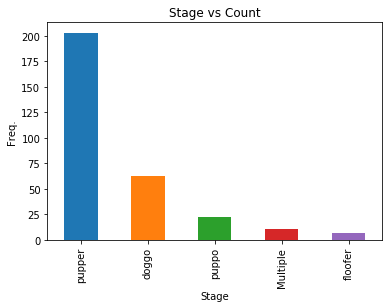

In [67]:
notNull_stage.value_counts().plot(kind='bar')
plt.xlabel('Stage')
plt.ylabel('Freq.')
plt.title('Stage vs Count');

We can notice Pupper is most common and least common is floofer in  WeRateDogs Twitter data 

## Change in Retweet and favorites per months over years

In [68]:
retweet_month= df.groupby('month')['retweet_count'].mean() # retweet mean per month
favorite_month = df.groupby('month')['favorite_count'].mean() # favorite mean per month
print('retweet_month' , retweet_month)
print('favorite_month' , favorite_month)

retweet_month month
1     2890.612766
2     2631.765714
3     2554.708333
4     3399.494737
5     4418.320000
6     4951.056000
7     4051.255474
8     3803.393443
9     3687.285714
10    4274.276923
11    1196.636103
12    2017.610451
Name: retweet_count, dtype: float64
favorite_month month
1      8389.702128
2      9556.234286
3      9141.404762
4     12534.168421
5     15722.570000
6     16341.232000
7     15858.138686
8     11170.901639
9     11435.476190
10    13294.169231
11     3289.808023
12     5145.021378
Name: favorite_count, dtype: float64


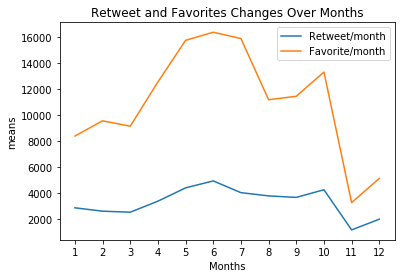

In [69]:
retweet_month.plot(kind="line",label="Retweet/month", xticks=np.arange(1,13))
favorite_month.plot(kind="line",label="Favorite/month" , xticks=np.arange(1,13))
plt.title("Retweet and Favorites Changes Over Months")
plt.xlabel("Months")
plt.ylabel("means")
plt.legend();

Based on the above figure in each year in October  there was decreasing in favorites and retweets.
On the other side favorites and retweets are increasing at the beginning of the year (in March )